Estimated mu:  0.15235104309138323
Estimated sigma:  0.2427495542037142


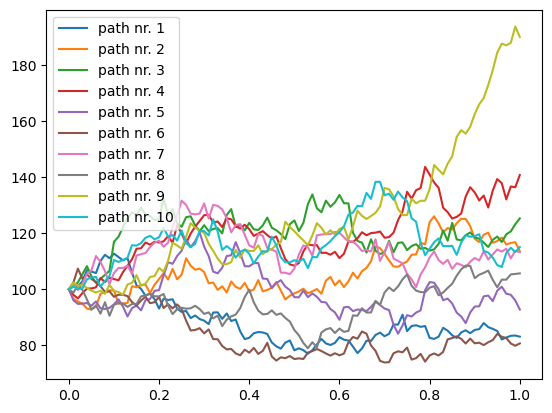

In [205]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Geometric Brownian Motion Parameters
A0 = 100
mu = 0.1
sigma = 0.25


# Time setup
T = 1        # Final time of the simulation
N = 100    # Number of time points excluding t=0
deltat = T/N # Time increment
time = np.linspace(0,T,N+1)

def exact_solution(t,S0,mu,sigma,z):

    return S0*np.exp((mu-0.5*sigma**2)*t + sigma*np.sqrt(t)*z)

# Montecarlo Simulation
# A <- Euler method
# S <- Using exact solution

Npaths = 10 # Number of paths to simulate
paths = []   # Initialize array containing each path


for j in range(Npaths):
    A = [] # Discretization of the SDE
    S = [] # Using the exact solution of the Geometric brownian motion

    A.append(A0) # Initialize A at t = 0 to be A0
    S.append(A0) # Initialize S at t = 0 to be S0 = A0

    for i in range(N):
        z = np.random.randn()
        A.append(A[i] + mu*A[i]*deltat + sigma*A[i]*np.sqrt(deltat)*z)
        S.append(exact_solution(deltat,S[i],mu,sigma, z))
        
    paths.append(A)



# Prints the simulated paths
# @input an array of paths

def PrintPaths(paths):
    i = 1
    for path in paths:
        name = "path nr. " + str(i)
        plt.plot(time, path, label = name)
        i = i + 1
    plt.legend()



# Estimates of Parameters from a collection of paths
# @Input: paths
# @Output: vector of estimated [mu, sigma]

def EstimateParameters(paths):
    estimatedMus = []
    estimatedSigmas = []
    for path in paths:
        logReturns = []
        for k in range (N-1):
            logReturns.append(np.log(path[k+1]/path[k]))
        estimatedMus.append(np.mean(logReturns)/deltat + 0.5*sigma**2)
        estimatedSigmas.append(np.std(logReturns)/ np.sqrt(deltat))
    return [np.mean(estimatedMus), np.mean(estimatedSigmas)]



############################## OUTPUT ##############################

estimatedParameters = EstimateParameters(paths)
print("Estimated mu: ", estimatedParameters[0])
print("Estimated sigma: ", estimatedParameters[1])
PrintPaths(paths)

In [206]:
from scipy.stats import norm

# Black Scholes Pricing for call option

def BlackScholesPriceCall(r,S, timeToMaturity, sigma, K):

    d1 = (np.log(S/K)+(r + 0.5*sigma**2)*timeToMaturity)/(sigma*np.sqrt(timeToMaturity))
    d2 = d1 - sigma*np.sqrt(timeToMaturity)
    return norm.cdf(d1)*S - norm.cdf(d2)*K*np.exp(-r*(timeToMaturity))


r = 0.03              # risk-free rate
S = 100               # value of the stock at t
timeToMaturity = 1    # time to maturity
K = 110               # strike price
sigma = 0.25           # volatility

print(BlackScholesPriceCall(r,S, timeToMaturity, sigma, K))

7.255776345971057


In [207]:
import numpy as np
import matplotlib.pyplot as plt


# Geometric Brownian Motion Parameters
A0 = 100
mu = 0.03
sigma = 0.25


# Time setup
T = 1        # Final time of the simulation
N = 40    # Number of time points excluding t=0
deltat = T/N # Time increment
time = np.linspace(0,T,N+1)

def exact_solution(t,S0,mu,sigma,z):

    return S0*np.exp((mu-0.5*sigma**2)*t + sigma*np.sqrt(t)*z)

# Montecarlo Simulation
# A <- Euler method
# S <- Using exact solution

Npaths = 100000 # Number of paths to simulate
paths = []   # Initialize array containing each path


for j in range(Npaths):
    A = [] # Discretization of the SDE
    S = [] # Using the exact solution of the Geometric brownian motion

    A.append(A0) # Initialize A at t = 0 to be A0
    S.append(A0) # Initialize S at t = 0 to be S0 = A0

    for i in range(N):
        z = np.random.randn()
        A.append(A[i] + mu*A[i]*deltat + sigma*A[i]*np.sqrt(deltat)*z)
        S.append(exact_solution(deltat,S[i],mu,sigma, z))
        
    paths.append(S)



def CallPriceMontecarlo(paths, K, r, timeToMaturity):
    payoff = []
    for path in paths:
        payoff.append(np.maximum(path[-1]-K,0))
    return np.exp(-r*timeToMaturity)*np.mean(payoff)

############################## OUTPUT ##############################
r = mu              # risk-free rate
timeToMaturity = 1    # time to maturity
K = 110               # strike price

print("Estimated call price: ", CallPriceMontecarlo(paths, K, r, timeToMaturity))


Estimated call price:  7.209961296645371


In [250]:
from scipy.optimize import minimize


# Black Scholes Pricing for call option
def BlackScholesPriceCall(r,S, timeToMaturity, sigma, K):

    d1 = (np.log(S/K)+(r + 0.5*sigma**2)*timeToMaturity)/(sigma*np.sqrt(timeToMaturity))
    d2 = d1 - sigma*np.sqrt(timeToMaturity)
    return norm.cdf(d1)*S - norm.cdf(d2)*K*np.exp(-r*(timeToMaturity))

# Geometric Brownian Motion Parameters
A0 = 100
mu = 0.03
sigma = 0.25


# Time setup
T = 1        # Final time of the simulation
N = 100    # Number of time points excluding t=0
deltat = T/N # Time increment
time = np.linspace(0,T,N+1)

def exact_solution(t,S0,mu,sigma,z):

    return S0*np.exp((mu-0.5*sigma**2)*t + sigma*np.sqrt(t)*z)

# Montecarlo Simulation
# A <- Euler method
# S <- Using exact solution

Npaths = 1000 # Number of paths to simulate
paths = []   # Initialize array containing each path


for j in range(Npaths):
    A = [] # Discretization of the SDE
    S = [] # Using the exact solution of the Geometric brownian motion

    A.append(A0) # Initialize A at t = 0 to be A0
    S.append(A0) # Initialize S at t = 0 to be S0 = A0

    for i in range(N):
        z = np.random.randn()
        A.append(A[i] + mu*A[i]*deltat + sigma*A[i]*np.sqrt(deltat)*z)
        S.append(exact_solution(deltat,S[i],mu,sigma, z))
        
    paths.append(S)



def CallPricesMontecarlo(paths, K, r, timeToMaturity):
    payoff = []
    for path in paths:
        payoff.append(np.maximum(path[-1]-K,0))
    return np.exp(-r*timeToMaturity)*np.array(payoff)







def lossFunction(parameters, marketPrices):
    S, sigma= parameters
    r = 0.03
    K = 110
    timeToMaturity = 1
    blackScholesPrice = BlackScholesPriceCall(r, S, timeToMaturity, sigma, K)
    return np.sum((blackScholesPrice-marketPrices)**2)

marketPrices = 7.25 + np.random.normal(0,1,1000)

result = minimize(lossFunction, [70,1], args=(marketPrices,))
print(result.x)
print(result.fun)
    


[99.07426953  0.26000321]
968.5764335083953
